## Introduction
In this project, we have to identify the emotion from the text. 

## Dataset description


## Importing imortant libraries

In [1]:
import pandas as pd
import nltk

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Loading dataset

In [2]:
dataset_path = '../ml/data/ISEAR.csv'
emotion_data = pd.read_csv(dataset_path)

In [3]:
emotion_data.head()

,0,joy,On days when I feel close to my partner and other friends. \nWhen I feel at peace with myself and also experience a close \ncontact with people whom I regard greatly.
0,1,fear,Every time I imagine that someone I love or I ...
1,2,anger,When I had been obviously unjustly treated and...
2,3,sadness,When I think about the short time that we live...
3,4,disgust,At a gathering I found myself involuntarily si...
4,5,shame,When I realized that I was directing the feeli...


In [4]:
emotion_data_array = emotion_data.values

In [5]:
emotion_data.shape

(7445, 3)

In [6]:
labels, sentence_collection = emotion_data_array[:, 1], emotion_data_array[:, 2]

## Text Augmentation
Since, we have not enough dataset for multiclass classification, we are using the method of text augmentation. We are using the library called, `nlpaug`.

In [7]:
import nlpaug.augmenter.word as naw

from nlpaug.util import Action

In [13]:
text = sentence_collection[0].replace("\n", "")
aug = naw.SynonymAug(aug_src='wordnet')
augmented_text = aug.augment(text)
print("Before: ", text, "\nAfter: ", augmented_text)
augmented_text = aug.augment(text)
print("\nBefore: ", text, "\nAfter: ", augmented_text)
augmented_text = aug.augment(text)
print("\nBefore: ", text, "\nAfter: ", augmented_text)

Before:  Every time I imagine that someone I love or I could contact a  serious illness, even death. 
After:  Every clip Ane imagine that someone 1 love or I could contact a severe illness , still death .

Before:  Every time I imagine that someone I love or I could contact a  serious illness, even death. 
After:  Every time One imagine that someone 1 make out or I could contact a life threatening illness , yet death .

Before:  Every time I imagine that someone I love or I could contact a  serious illness, even death. 
After:  Every prison term I imagine that someone Ane love or I could get hold of a dangerous illness , even death .


In [11]:
data_struc = {'emotion_label': [], 'emotion_text': []}
aug_dataframe = pd.DataFrame(data_struc)

In [12]:
aug_dataframe

,emotion_label,emotion_text


Here, we are using two augmentation techniques, namely, `synonyms augmentation` and `random word swapping`.

In [17]:
data_struc = {'emotion_label': [], 'emotion_text': []}
aug_dataframe = pd.DataFrame(data_struc)
for label, sentence in zip(labels, sentence_collection):
    if sentence.find("\n") > 0:
        sentence = sentence.replace("\n", "")
        augmented_sent = aug.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': sentence},
            ignore_index=True
        )
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent},
            ignore_index=True
        )
        augmented_sent = aug.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent},
            ignore_index=True
        )
    
        aug1 = naw.RandomWordAug(action="swap")
        augmented_sent1 = aug1.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent1},
            ignore_index=True
        )
    else:
        augmented_sent = aug.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': sentence},
            ignore_index=True
        )
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent},
            ignore_index=True
        )
        augmented_sent = aug.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent},
            ignore_index=True
        )
        aug1 = naw.RandomWordAug(action="swap")
        augmented_sent1 = aug1.augment(sentence)
        aug_dataframe = aug_dataframe.append(
            {'emotion_label': label, 'emotion_text': augmented_sent1},
            ignore_index=True
        )

In [19]:
aug_dataframe.to_csv("./augmented_emotion_data.csv")

In [20]:
aug_array = aug_dataframe.values

In [21]:
aug_dataframe.shape

(29780, 2)

In [22]:
aug_array[:, 1]

array(['Every time I imagine that someone I love or I could contact a  serious illness, even death.',
       'Every time Iodine imagine that someone I love or Iodine could adjoin a serious sickness , even death .',
       'Every time One guess that somebody Ace love operating room I could contact a serious illness , even death .',
       ...,
       'Once I quarrelled with my sister and after this I deliberately messed upwardly her belongings .',
       'Erstwhile I quarrelled with my sister and after this One deliberately messed up her belongings .',
       'Once I my quarrelled with and sister after this I deliberately messed up her . belongings'],
      dtype=object)

In [23]:
labels, sentence_collection = aug_array[:, 0], aug_array[:, 1]

In [24]:
labels

array(['fear', 'fear', 'fear', ..., 'guilt', 'guilt', 'guilt'],
      dtype=object)

### Tokenization

In [25]:
whitespace_tokenizer = nltk.tokenize.WhitespaceTokenizer()
treebank_tokenizer = nltk.tokenize.TreebankWordTokenizer()

In [26]:
whitespace_tokenized_sentences = []
for sentence in sentence_collection:
    whitespace_tokenized_sentences.append(
                                    whitespace_tokenizer.tokenize(sentence)
                                    )

In [25]:
treebank_tokenized_sentences = []
for sentence in sentence_collection:
    treebank_tokenized_sentences.append(treebank_tokenizer.tokenize(sentence))

### Token normalization

In [27]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [28]:
lemmatized_sentences = []
for sentence in whitespace_tokenized_sentences:
    lemmatized_sentences.append(" ".join(lemmatizer.lemmatize(token.lower()) for token in sentence))

In [46]:
lemmatized_sentences[-5]

'a few back day i had a tutorial class and the teacher randomly assigned one person in each to group make a presentation . the discussion in our group had been confused the and presentation not wa very prepared well . unfortunately i wa selected to present i and could keep not calm , wa confused and result wa very poor . i felt really ashamed .'

In [48]:
from nltk.corpus import stopwords
from string import punctuation

StopWords = set(stopwords.words('english'))

preprocessed_sentences = []
for sentence in lemmatized_sentences:
    temp_sentence = ""
    for word in sentence.split(" "):
        if word in punctuation:
            if word.find("!") >= 0:
                temp_sentence += word + " "
            else:
                pass
        elif word not in StopWords:
            temp_sentence += word + " "
    preprocessed_sentences.append(temp_sentence.strip())

In [52]:
preprocessed_sentences[:15]

['every time imagine someone love could contact serious illness, even death.',
 'every time iodine imagine someone love iodine could adjoin serious sickness even death',
 'every time one guess somebody ace love operating room could contact serious illness even death',
 'every time imagine someone love could contact illness serious even death',
 'obviously unjustly treated possibility elucidating this.',
 'one obviously unjustly treat sustain possibility elucidating',
 'obviously unjustly address give birth possibility clear',
 'obviously unjustly treated possibility elucidating',
 'think short time live relate period life think use short time.',
 'call short time relate information technology time period animation think non use short time',
 'one think brusk time live relate period life believe use myopic time',
 'think time short live relate period life think use time short',
 'gathering found involuntarily sitting next two people expressed opinion considered low discriminating.',
 'g

In [53]:
import numpy as np

X_data = np.array(preprocessed_sentences)

In [54]:
labels.shape

(29780,)

In [55]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
encoder = OrdinalEncoder()
encoded_label = encoder.fit_transform(X=(labels.reshape(-1, 1)))

In [57]:
encoded_label

array([[2.],
       [2.],
       [2.],
       ...,
       [3.],
       [3.],
       [3.]])

In [58]:
tf_vectorizer = TfidfVectorizer()
X_features = tf_vectorizer.fit_transform(X_data)

In [59]:
X_values = X_features.toarray()

In [60]:
y_values = encoded_label.ravel()

In [61]:
X_values.shape

(29780, 13075)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2)

In [63]:
X_train.shape[0]

23824

In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [65]:
y_predicted = model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_test, y_predicted)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       834
         1.0       0.84      0.85      0.85       833
         2.0       0.89      0.90      0.89       872
         3.0       0.79      0.79      0.79       810
         4.0       0.87      0.89      0.88       896
         5.0       0.84      0.82      0.83       825
         6.0       0.84      0.78      0.81       886

    accuracy                           0.83      5956
   macro avg       0.83      0.83      0.83      5956
weighted avg       0.83      0.83      0.83      5956



In [67]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.8)
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.8, class_prior=None, fit_prior=True)

In [68]:
y_predicted = nb_model.predict(X_test)

In [69]:
accuracy_score(y_test, y_predicted)

0.7590664875755541

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.constraints import max_norm
import tensorflow.keras.backend

In [53]:
model = Sequential()

model.add(Dense(125, input_dim=X_values.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

sgd = SGD(lr=0.03)

model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [54]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=20)

Train on 23826 samples, validate on 5957 samples
Epoch 1/50
23826/23826 [==============================] - 15s 613us/sample - loss: 1.9448 - accuracy: 0.1495 - val_loss: 1.9388 - val_accuracy: 0.1450
Epoch 2/50
23826/23826 [==============================] - 12s 512us/sample - loss: 1.9313 - accuracy: 0.1884 - val_loss: 1.9117 - val_accuracy: 0.3824
Epoch 3/50
23826/23826 [==============================] - 12s 512us/sample - loss: 1.8923 - accuracy: 0.2504 - val_loss: 1.8406 - val_accuracy: 0.5034
Epoch 4/50
23826/23826 [==============================] - 12s 509us/sample - loss: 1.7961 - accuracy: 0.3246 - val_loss: 1.6872 - val_accuracy: 0.4460
Epoch 5/50
23826/23826 [==============================] - 12s 501us/sample - loss: 1.6320 - accuracy: 0.4044 - val_loss: 1.4778 - val_accuracy: 0.5179
Epoch 6/50
23826/23826 [==============================] - 10s 425us/sample - loss: 1.4573 - accuracy: 0.4763 - val_loss: 1.2913 - val_accuracy: 0.6005
Epoch 7/50
23826/23826 [=====================

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

Text(91.68, 0.5, 'predicted label')

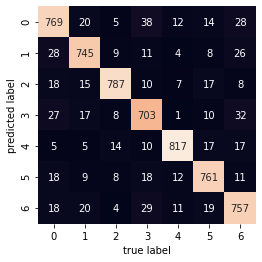

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_predicted)
sns.heatmap(confusion_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, test_label))